In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


with open('./iris/iris.data', 'r') as fr:
    raw_data = []
    lines = fr.readlines()
    for line in lines:
        line = line.strip()
        nums = line.split(',')
        if len(nums) == 5 and ( nums[4] == 'Iris-setosa' or nums[4] == 'Iris-versicolor'):
            if nums[4] == 'Iris-setosa': nums[4] = 0
            if nums[4] == 'Iris-versicolor': nums[4] = 1
            nums = [float(n) for n in nums]
            raw_data.append(nums)
raw_data = np.array(raw_data)

In [143]:
np.random.shuffle(raw_data)
train_data = raw_data[:80, :]
test_data = raw_data[80:, :]

In [144]:
X_train = train_data[:, 0:2]
y_train = train_data[:, 4]
X_test = test_data[:, 0:2]
y_test = test_data[:, 4]
print(X_train.shape, y_train.shape, X_test.shape, y_train.shape)

(80, 2) (80,) (20, 2) (80,)


In [145]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

def predict_function(weight, feature):
    num_sample = feature.shape[0]
    Y_prediction = np.zeros(num_sample)

    A = sigmoid(np.dot(feature, weight))
    for  i in range(num_sample):
        if A[i]>0.5:
            Y_prediction[i] = 1
        else:
            Y_prediction[i] = 0
    return Y_prediction

def augmented_feature(feature):
    num_sample = feature.shape[0]
    feature_1 = np.ones(num_sample)
    return np.column_stack((feature, feature_1))

def logistic_regression(X_train,y_train,X_test,y_test,learning_rate=0.1,num_iterations=2000,print_cost=False):
    X_train = augmented_feature(X_train)
    X_test = augmented_feature(X_test)
    costs = []
    w = np.zeros(3)
    num_sample, num_feature = X_train.shape
    for i in range(num_iterations):
        predict = sigmoid(np.dot(X_train, w))
        cost = - (1/num_sample) * np.sum(y_train*np.log(predict) + (1-y_train)*np.log(1-predict) )
        if i % 100 == 99: costs.append(cost)
        gradient = np.dot(X_train.T, predict - y_train) / num_feature
        w = w - gradient * learning_rate
    
    prediction_train = predict_function(w, X_train)
    prediction_test = predict_function(w, X_test)

    #计算准确率，分别在训练集和测试集上：
    accuracy_train = 1 - np.mean(np.abs(prediction_train - y_train))
    accuracy_test = 1 - np.mean(np.abs(prediction_test - y_test))
    print("Accuracy on train set:",accuracy_train )
    print("Accuracy on test set:",accuracy_test )

   #为了便于分析和检查，我们把得到的所有参数、超参数都存进一个字典返回出来：
    d = {"costs": costs,
         "w" : w,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train_acy":accuracy_train,
         "test_acy":accuracy_test
        }
    return d
num_iterations = 4000
d = logistic_regression(X_train, y_train, X_test, y_test, num_iterations = num_iterations, learning_rate = 1e-4, print_cost = False)
print(d['w'])

Accuracy on train set: 0.9875
Accuracy on test set: 1.0
[ 0.96447829 -1.60152039 -0.15283081]


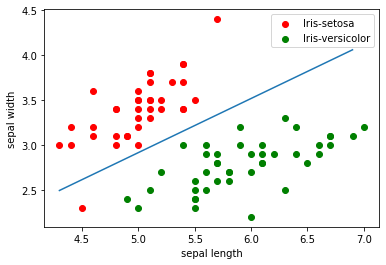

In [146]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')

sepal_length = np.squeeze(X_train[:, 0])
sepal_width = np.squeeze(X_train[:, 1])
for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        s1 = plt.scatter(sepal_length[i], sepal_width[i], color = 'r')
    elif y_train[i] == 1:
        s2 = plt.scatter(sepal_length[i], sepal_width[i], color = 'g')
min_x = np.min(sepal_length)
max_x = np.max(sepal_length)
x = np.arange(min_x, max_x, 0.1)
weight = d['w'][:2]
bias = d['w'][2]
y = - ( bias + weight[0] * x) / weight[1]
decision = plt.plot(x,y)
plt.legend(handles=(s1,s2),labels=('Iris-setosa','Iris-versicolor'),loc='best')
plt.show()

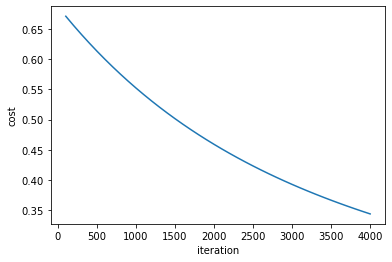

In [147]:
costs = d['costs']
iter_range = np.arange(100, num_iterations + 100, 100)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.plot(iter_range, costs)
plt.show()